<a href="https://colab.research.google.com/github/shreyasrkarthik/A8_Stick_It_To_Em/blob/main/Assignment1_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [1]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-09-21 04:05:09--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-09-21 04:05:10--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-09-21 04:05:10--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 

We convert this file with one JSON record on each line to a list of dictionaries.

In [2]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [16]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [7]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
import pandas as pd
document_df = pd.DataFrame(terms)

specific_doc_df = document_df[document_df["id"] == "APW_ENG_20100101.0001"]
specific_doc_df.sort_values("count", ascending=False).head(6)["term"].tolist()

['a', 'the', 'of', 'to', 'brooks', 'and']

In [13]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.
specific_doc_df = document_df[document_df["id"] == "APW_ENG_20100102.0077"]
grouped_df = specific_doc_df.groupby(["field", "term"]).agg({"count": "sum"}).reset_index()
top_10_all_fields = grouped_df.sort_values("count", ascending=False).groupby("field").head(10).reset_index()
top_10_all_fields[["field", "term", "count"]]

,field,term,count
0,body,the,50
1,body,in,21
2,body,to,21
3,body,and,19
4,body,of,14
5,body,a,13
6,body,was,8
7,body,militants,8
8,body,on,8
9,body,said,8


In [17]:
# TODO: Print the 10 terms with the highest total count in the corpus.
document_df.groupby("term").agg({"count": "sum"}).reset_index().sort_values(
    "count", ascending=False).head(10)["term"].tolist()

['the', 'to', 'in', 'a', 'of', 'and', 'said', 'for', 'on', 'that']

Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [19]:
# TODO: Compute the number of distinct documents in the collection.
N = document_df["id"].nunique()

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.

doc_freq_df = document_df.groupby("term").agg({"id":"nunique"}).reset_index()
doc_freq_dict = dict(zip(doc_freq_df["term"], doc_freq_df["id"]))
doc_freq_dict

{'a': 2571,
 'aaaar': 1,
 'aafter': 1,
 'aamir': 2,
 'aardvarks': 1,
 'aare': 1,
 'aarhus': 18,
 'aaron': 15,
 'ab': 12,
 'ababa': 6,
 'abalone': 1,
 'abandon': 18,
 'abandoned': 11,
 'abandoning': 11,
 'abb': 6,
 'abbas': 32,
 'abbleby': 1,
 'abbot': 2,
 'abbott': 4,
 'abc': 10,
 "abc's": 6,
 'abdel': 17,
 'abdellah': 1,
 'abdi': 2,
 'abdirahman': 1,
 'abdolhossein': 1,
 'abdomen': 2,
 'abdominal': 2,
 'abdou': 1,
 'abdoulay': 1,
 'abdoulaye': 2,
 'abducted': 3,
 'abducting': 1,
 'abductions': 4,
 'abdul': 18,
 'abdulahi': 2,
 'abdulatif': 2,
 'abdulla': 6,
 'abdullah': 70,
 'abdullahi': 2,
 'abdulle': 1,
 'abdulmutallab': 124,
 "abdulmutallab's": 51,
 'abdulmuttalab': 1,
 'abdulzai': 5,
 'abdur': 12,
 'abe': 10,
 'abel': 2,
 'abercrombie': 2,
 'aberdeen': 2,
 "aberdeen's": 1,
 'abeyance': 1,
 'abhisit': 3,
 'abide': 2,
 'abiding': 1,
 'abigail': 1,
 'abilities': 2,
 'ability': 49,
 'ablaze': 5,
 'able': 181,
 'abn': 2,
 'abnormality': 2,
 'aboard': 63,
 'abolish': 2,
 'abolished': 5,

In [20]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
relative_doc_freq_the = doc_freq_dict["the"]/N
relative_doc_freq_the

0.9704823614110871

Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [26]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import math
tfidf_df = document_df.groupby(["id", "term"]).agg({"count": "sum"}).reset_index()
tfidf_df["tfidf"] = tfidf_df.apply(lambda x: math.log(x["count"] + 1) * math.log(N/doc_freq_dict[x["term"]]), axis=1)
tfidf_terms = tfidf_df[["id", "term", "tfidf"]]
tfidf_terms

,id,term,tfidf
0,APW_ENG_20100101.0001,a,0.219394
1,APW_ENG_20100101.0001,about,0.656793
2,APW_ENG_20100101.0001,abuse,3.237961
3,APW_ENG_20100101.0001,academy,3.419818
4,APW_ENG_20100101.0001,accused,2.885155
...,...,...,...
524173,APW_ENG_20100107.1067,tortured,3.900271
524174,APW_ENG_20100107.1067,us,1.179026
524175,APW_ENG_20100107.1067,video,2.541637
524176,APW_ENG_20100107.1067,who,0.544176


In [29]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
term_docu_df = tfidf_terms.sort_values("tfidf", ascending=False).head(20)
term_doc_pairs = list(zip(term_docu_df["term"], term_docu_df["id"]))
term_doc_pairs

[('guarani', 'APW_ENG_20100103.0028'),
 ('nomination', 'APW_ENG_20100105.0061'),
 ('greyhound', 'APW_ENG_20100105.0014'),
 ('methane', 'APW_ENG_20100105.0446'),
 ('kheire', 'APW_ENG_20100103.0015'),
 ('shakespeare', 'APW_ENG_20100107.0036'),
 ('guild', 'APW_ENG_20100105.0061'),
 ('shakespeare', 'APW_ENG_20100106.0428'),
 ('elkhart', 'APW_ENG_20100102.0197'),
 ('magna', 'APW_ENG_20100106.0075'),
 ('sutton', 'APW_ENG_20100106.1325'),
 ('minhas', 'APW_ENG_20100107.0928'),
 ('greyhounds', 'APW_ENG_20100105.0014'),
 ('shiites', 'APW_ENG_20100104.0108'),
 ('tohti', 'APW_ENG_20100104.0043'),
 ('krewe', 'APW_ENG_20100107.0018'),
 ('punk', 'APW_ENG_20100103.0016'),
 ('netbooks', 'APW_ENG_20100105.0997'),
 ('netbooks', 'APW_ENG_20100105.1060'),
 ('golden', 'APW_ENG_20100105.0061')]

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [32]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
term_freq_df = document_df.groupby("term").agg({"count": "sum"}).reset_index()
term_freq_df = term_freq_df.sort_values("count", ascending=False)
frequency = list(zip(term_freq_df["term"], term_freq_df["count"]))
frequency

[('the', 62216),
 ('to', 26931),
 ('in', 25659),
 ('a', 23383),
 ('of', 22326),
 ('and', 22125),
 ('said', 10888),
 ('for', 9716),
 ('on', 9382),
 ('that', 8942),
 ('was', 7791),
 ('is', 6317),
 ('with', 6283),
 ('at', 6078),
 ('he', 5874),
 ('it', 5357),
 ('from', 5094),
 ('as', 4746),
 ('by', 4641),
 ('has', 4355),
 ('an', 4087),
 ('have', 4012),
 ('his', 3904),
 ('be', 3693),
 ('but', 3638),
 ('s', 3567),
 ('u', 3518),
 ('were', 3478),
 ('not', 3320),
 ('are', 3218),
 ('will', 3063),
 ('its', 2955),
 ('who', 2904),
 ('had', 2900),
 ('after', 2876),
 ('year', 2816),
 ('they', 2423),
 ('this', 2331),
 ('new', 2263),
 ('been', 2241),
 ('more', 2225),
 ('two', 2136),
 ('security', 2097),
 ('or', 2076),
 ('which', 2059),
 ('about', 2003),
 ('percent', 1966),
 ('up', 1917),
 ('their', 1898),
 ('al', 1897),
 ('would', 1851),
 ('also', 1826),
 ('last', 1807),
 ('first', 1761),
 ('than', 1748),
 ('i', 1722),
 ('one', 1717),
 ('other', 1680),
 ('people', 1678),
 ('out', 1677),
 ('government',

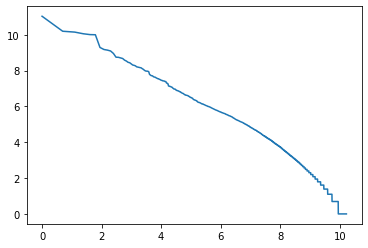

In [34]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
x_axis = [math.log(i) for i in range(1, len(frequency) + 1)]
y_axis = [math.log(i[1]) for i in frequency]
from matplotlib import pyplot as plt
plt.plot(x_axis, y_axis)

In [35]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = sum([x[1] for x in frequency])
ntokens

1000000

In [36]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top_10_ntokens = sum([x[1] for x in frequency[:10]])
top_10_ntokens/ntokens

0.221568

In [40]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
one_occurrence_ntokens = sum([x[1] for x in frequency if x[1] == 1])
one_occurrence_ntokens/ntokens

0.006641

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the September 19, 1922, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of September, 1922, i.e., the issues with a date field that starts with `1922-09`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from September 1922. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [61]:
# TODO: Data acquisition code here.
all_text_data = []
import csv
import urllib.request, json 

with urllib.request.urlopen("https://chroniclingamerica.loc.gov/lccn/sn87093407.json") as url:
    data = json.load(url)
for i, issue in enumerate(data["issues"]):
  print("Issue:", i)
  if issue["date_issued"].split("-")[0] == "1922" and issue["date_issued"].split("-")[1] == "09":
    records_url = issue["url"]
    with urllib.request.urlopen(records_url) as url:
      records_data = json.load(url)
      pages = records_data["pages"]
      for page in pages:
        with urllib.request.urlopen(page["url"]) as page_url:
          pages_data = json.load(page_url)
          try:
            text_data = urllib.request.urlopen(pages_data["text"])
            for line in text_data:
              all_text_data.append(str(line).strip("\n"))
          except Exception as e:
            print(e)
          # with urllib.request.urlopen(pages_data["text"]) as text_url:
          #   print(pages_data["text"], text_url.data)
          #   try:
          #     text_data = json.load(text_url, ignore_errors=True)
          #     all_text_data.append(text_data)
          #   except JSONDecodeError as e:
          #     print("Error decoding the JSON data")

print(all_text_data[:10])
with open("downloaded_text.txt", 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(all_text_data)

Streaming output truncated to the last 5000 lines.
Issue: 3078
Issue: 3079
Issue: 3080
Issue: 3081
Issue: 3082
Issue: 3083
Issue: 3084
Issue: 3085
Issue: 3086
Issue: 3087
Issue: 3088
Issue: 3089
Issue: 3090
Issue: 3091
Issue: 3092
Issue: 3093
Issue: 3094
Issue: 3095
Issue: 3096
Issue: 3097
Issue: 3098
Issue: 3099
Issue: 3100
Issue: 3101
Issue: 3102
Issue: 3103
Issue: 3104
Issue: 3105
Issue: 3106
Issue: 3107
Issue: 3108
Issue: 3109
Issue: 3110
Issue: 3111
Issue: 3112
Issue: 3113
Issue: 3114
Issue: 3115
Issue: 3116
Issue: 3117
Issue: 3118
Issue: 3119
Issue: 3120
Issue: 3121
Issue: 3122
Issue: 3123
Issue: 3124
Issue: 3125
Issue: 3126
Issue: 3127
Issue: 3128
Issue: 3129
Issue: 3130
Issue: 3131
Issue: 3132
Issue: 3133
Issue: 3134
Issue: 3135
Issue: 3136
Issue: 3137
Issue: 3138
Issue: 3139
Issue: 3140
Issue: 3141
Issue: 3142
Issue: 3143
Issue: 3144
Issue: 3145
Issue: 3146
Issue: 3147
Issue: 3148
Issue: 3149
Issue: 3150
Issue: 3151
Issue: 3152
Issue: 3153
Issue: 3154
Issue: 3155
Issue: 3156
I

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [65]:
# TODO: Tokenization code here.
tokens = []
for line in all_text_data:
  # strip `b` from start of the sentence, `\\n` from end of the sentence.
  line_tokens = [x.lower() for x in line.strip("b'").strip("\\n'").split(" ")]
  print(line_tokens)
  tokens.extend(line_tokens)

Streaming output truncated to the last 5000 lines.
['northern', 'and', 'nartharn', 'pacific', 'ratil']
['way', 'rompanlea.']
['tha', 'naw', 'export', 'rate*', 'are', 'a', 'r\\xc2\\xbb']
['xe2\\x80\\xa2', 'lit', 'of', 'a', 'new', 'echedule', '\\xc2\\xbb\\xc2\\xbbtabli\\xc2\\xbbl.rd']
['y', 'the', 'chica*o.', 'milwaukee', 'a', 'st']
['paul', 'ayctrm.']
['the', 'reduction', 'over', 'the', 'domaetic']
['rataa', 'from', 'montana', 'will', 'total', 't']
['centa', 'a', 'hundred', 'pound*', 'on', 'whftt,']
['and', 'will', 'ena', 'bin', 'irrowere', 'of', 'that']
['xe2\\x80\\xa2ectlon', 'lo', 'export', 'ihrti', 'brattle', 'aa']
['cheaply', 'a*', 'thru', 'atlantic', 'or', 'gulf', 'of']
['mexico', 'porta.']
['bureau', 'of']
['missing']
['relatives', '!']
['tim', 'mir', 'lotltm', 'lis', 'rrmitrrn', 'ta', 'm', 'lu>']
['4rp\\xc2\\xabrtinf\\xc2\\xabl', 'aa', 'an', 'aid', 'in', 'finding', 'nimm']
['ralatlraa', 'nr', 'frlaada.', 'tha', 'daparlmant', 'la']
['i*', 'halp', 'lii', 'ra\\xc2\\xabnltlaa', 'tbo

In [69]:
import re
# Filter the tokens

# Remove tokens with "\\"
filtered_tokens = [x for x in tokens if '\\' not in x]
# Remove punctuations from tokens

# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def cleaned(x):
  res = ""
  for s in x:
    if s not in punc:
      res += s
  return res

filtered_tokens = [cleaned(x) for x in filtered_tokens]
filtered_tokens

['people',
 'of',
 'the',
 'pacific',
 'northwest',
 'have',
 'elected',
 'the',
 'star',
 'their',
 'favorite',
 'seattle',
 'newspaperby',
 '15000',
 'plurality',
 'union',
 'chiefs',
 'enjoined',
 'lidt',
 'weather',
 'om',
 'kalmrday',
 '111',
 'i',
 'i',
 'tfif',
 'itvatrrly',
 'vtadi',
 '11',
 'ii',
 '|',
 'trmprraltil',
 'i',
 'ait',
 'j',
 'i',
 'ft',
 'minimum',
 's7',
 'toaijr',
 'dim',
 'm',
 'volume',
 '24',
 'no',
 '162',
 'hotel',
 'was',
 'the',
 'name',
 'for',
 '3000x0',
 'community',
 'hotel',
 'which',
 'was',
 'selected',
 'by',
 'the',
 'corporation',
 'directors',
 'at',
 'a',
 'meeting',
 'held',
 'friday',
 'forenoon',
 'many',
 'windows',
 'of',
 'the',
 'big',
 'structure',
 'will',
 'afford',
 'a',
 'view',
 'of',
 'the',
 'mountain',
 'range',
 'from',
 'which',
 'the',
 'name',
 'is',
 'derived',
 'i',
 'home',
 'i',
 'brew',
 'i',
 '|my',
 'folk',
 'dont',
 'i',
 '|an',
 'hi',
 'puget',
 'sound',
 'mul',
 'in',
 'today',
 'birth',
 'record',
 'mr',
 'orubb

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

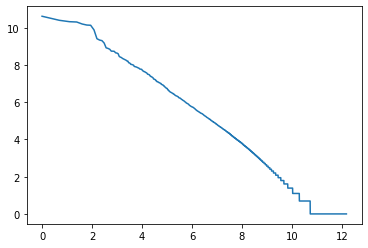

In [72]:
# TODO: Plotting code here.
from collections import Counter
token_counts = dict(Counter(filtered_tokens))
frequency = sorted(token_counts.items(), key=lambda item: (-item[1], item[0]))

x_axis = [math.log(i) for i in range(1, len(frequency) + 1)]
y_axis = [math.log(i[1]) for i in frequency]
from matplotlib import pyplot as plt
plt.plot(x_axis, y_axis)

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.